## Identification of ride-sharing patterns: from passenger preferences to the impact of external factors on journeys.

 As part of this project, we are working as an analyst for Zuber, a new ride-sharing company that is launching in Chicago. We are interested in understanding passenger preferences and the impact of external factors on travel.

We will investigate a database, analyze competitor data, and test a hypothesis on the impact of weather conditions on travel frequency.

Importing libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt

Exploratory data analysis

In the previous steps of this project, we worked the database on Platform and retrieved the following CSV file:
- `project_sql_result_07.csv` 

In addition to the data we retrieved from Platform, we've been given two additional files. We now have the following two CSVs:
- `project_sql_result_01.csv` 
- `project_sql_result_04.csv`

We are also handed the following information about the fields on these files:

project_sql_result_01
- `company_name`: taxi company name;
- `trips_amount`: the number of rides for each taxi company on November 15-16, 2017. 

project_sql_result_04  
- `dropoff_location_name`: Chicago neighborhoods where rides ended;
- `average_trips`: the average number of rides that ended in each neighborhood in November 2017.

project_sql_result_07 
- `start_ts:` pickup date and time;
- `weather_condition:` weather conditions at the moment the ride started;
- `duration_seconds:` ride duration in seconds.

Let us start by importing the files and studying the information about them.

In [2]:
# Load each csv to its own variable
result_01 = pd.read_csv('/datasets/project_sql_result_01.csv') 
result_04 = pd.read_csv('/datasets/project_sql_result_04.csv') 
result_07 = pd.read_csv('/datasets/project_sql_result_07.csv') 
 

# Create a tuple from the dataframes.
data = (result_01, result_04, result_07) 
# Assign names to the dataframes
result_01.name = 'project_sql_result_01'
result_04.name = 'project_sql_result_04'
result_07.name = 'project_sql_result_07'

# Print a summary of the dataFrames
for df in data:
    print(f'Name: {df.name}')
    print()
    df.info()
    print()
    print("*"*60)
    print()

Name: project_sql_result_01

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB

************************************************************

Name: project_sql_result_04

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB

************************************************************

Name: project_sql_result_07

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):

Based on the printed information, we see that there are no null values in the dataframes. The first dataframe consists of 64 entries in two columns, the second consists of 94 entries in two columns,  and the third consists of 1068 entries in three-columns. The data takes up only a small amount of memory space. In the columns we have.
- 1 columns of dtype 'int64': `trips_amount`;
- 2 columns of dtype 'float64': `average_trips`, `duration_seconds`; 
- 4 columns of dtype 'object': `company_name`, `dropoff_location_name`, `start_ts`, `weather_conditions`.

We see that the pickup dates and times are stored as strings in the `start_ts` column. It is therefore necessary to change the column data type to datetime objects. Before converting the types, let's also examine the contents of each column.



In [3]:
# Display first and last five rows of the dataFrames. 
for df in data:
    print(f'Name: {df.name}')
    print()
    print('First 5 rows:')
    display(df.head())
    print('Last 5 rows')
    display(df.tail())
    print()
    print("*"*60)
    print()
    

Name: project_sql_result_01

First 5 rows:


,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


Last 5 rows


,company_name,trips_amount
59,4053 - 40193 Adwar H. Nikola,7
60,2733 - 74600 Benny Jona,7
61,5874 - 73628 Sergey Cab Corp.,5
62,"2241 - 44667 - Felman Corp, Manuel Alonso",3
63,3556 - 36214 RC Andrews Cab,2



************************************************************

Name: project_sql_result_04

First 5 rows:


,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


Last 5 rows


,dropoff_location_name,average_trips
89,Mount Greenwood,3.137931
90,Hegewisch,3.117647
91,Burnside,2.333333
92,East Side,1.961538
93,Riverdale,1.800000



************************************************************

Name: project_sql_result_07

First 5 rows:


,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


Last 5 rows


,start_ts,weather_conditions,duration_seconds
1063,2017-11-25 11:00:00,Good,0.0
1064,2017-11-11 10:00:00,Good,1318.0
1065,2017-11-11 13:00:00,Good,2100.0
1066,2017-11-11 08:00:00,Good,1380.0
1067,2017-11-04 16:00:00,Bad,2834.0



************************************************************



We see that the pick up dates and times are stored in `%Y-%m-%d %H:%M:%S` format. Let us also check the summary statistics in the columns and the value counts of string objects. 

In [4]:
# Check summary statistics in the columns of the dataframes
for df in data:
    print(f'Name: {df.name}')
    print()
    for col in df:
        display(df[col].describe().to_frame())
        if type(col) == 'object':
            display(df[col].value_counts().to_frame())

        print()
    print("*"*60)
    print() 
        

Name: project_sql_result_01



,company_name
count,64
unique,64
top,Blue Diamond
freq,1


,trips_amount
count,64.000000
mean,2145.484375
std,3812.310186
min,2.000000
25%,20.750000
50%,178.500000
75%,2106.500000
max,19558.000000



************************************************************

Name: project_sql_result_04



,dropoff_location_name
count,94
unique,94
top,O'Hare
freq,1


,average_trips
count,94.000000
mean,599.953728
std,1714.591098
min,1.800000
25%,14.266667
50%,52.016667
75%,298.858333
max,10727.466667



************************************************************

Name: project_sql_result_07



,start_ts
count,1068
unique,81
top,2017-11-11 10:00:00
freq,48


,weather_conditions
count,1068
unique,2
top,Good
freq,888


,duration_seconds
count,1068.000000
mean,2071.731273
std,769.461125
min,0.000000
25%,1438.250000
50%,1980.000000
75%,2580.000000
max,7440.000000



************************************************************



Let's list our findings:
- Our dataframes contains data on 64 different taxi companies.
- The number of trips of each taxi company (November 15 and 16, 2017 according to the description provided to us) is in the range [2, 19558]. The lower limit of the range is oddly low. We don't know how taxi companies sign up for Zuber, but it's possible that some are just trying to offer their services individually and don't catch multiple rides. Furthermore, we observed that the average number of trips was about 2145.5 trips, while the median was 178.5. It is therefore clear that the data contain significant statistical outliers. However, we do not expect them to be bad data, but well-known taxi companies. A taxi company can be known for having a large number of licensed vehicles in convenient locations available for reservation at any time and under various external conditions (i.e. bad weather). The car has obtained very high customer satisfaction. So these large statistical outliers will provide valuable information about our trading partners.
- Our dataframes contain data on 94 different deposit locations. - The average number of journeys ended in each neighborhood (in November 2017 according to the description provided to us) is in the range [1.8, 10727.5]. Therefore, there can be significant differences in the mean prevalence of neighborhoods. In fact, the average for the number of trips ending up in each neighborhood is about 600. Otherwise, the mean is about 52. Again, we also have significant statistical outliers in this data. However, we also do not expect them to indicate anomalies. These major outliers should correspond to neighborhoods that are very popular for our service. These large statistical outliers will therefore provide valuable insights into where our clients will live/work/hang out/etc.
- Our dataframes contain information about 1068 journeys between Loop International Airport and O'Hare on Sundays of November 2017. - As we know from previous steps done in the background. In the background, weather conditions are grouped into two categories as `Good` and `Bad`. The majority of trips (about 83.15%) are done in good weather. - Travel time data varies between [0.7440] seconds. So the maximum trip takes about 2 hours, which is quite large compared to the mean and average, which are about 2071.7 seconds and 1980 seconds, respectively, making the average trips less than a third of the travel time. maximum displacement is observed. Some journeys may take longer due to unfavorable traffic conditions (bad weather, road blocked by accident), but we should investigate further to see if this very long journey time is justified. reason or not. At the other extreme, obviously no trip can take 0 seconds. Therefore, we may need to discard or replace too short or too long travel times before testing the hypotheses. We will explore the suspicious travel times in more detail in step 5, before performing the hypothesis tests.

Let us convert the data type of the `start_ts` column. Let us also create two new columns, one to store only the ride date and the other the pick-up time.

In [5]:
# Change 'start_ts' column to datetime
result_07['start_ts'] = pd.to_datetime(result_07['start_ts'], format='%Y-%m-%d %H:%M:%S', errors='coerce')
result_07['start_date'] = result_07['start_ts'].dt.date
result_07['start_time'] = result_07['start_ts'].dt.time

# Display dataframe's information and first few rows
result_07.info()
print()
result_07.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   float64       
 3   start_date          1068 non-null   object        
 4   start_time          1068 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 41.8+ KB



,start_ts,weather_conditions,duration_seconds,start_date,start_time
0,2017-11-25 16:00:00,Good,2410.0,2017-11-25,16:00:00
1,2017-11-25 14:00:00,Good,1920.0,2017-11-25,14:00:00
2,2017-11-25 12:00:00,Good,1543.0,2017-11-25,12:00:00
3,2017-11-04 10:00:00,Good,2512.0,2017-11-04,10:00:00
4,2017-11-11 07:00:00,Good,1440.0,2017-11-11,07:00:00


Our dataframe should have only dates that correspond to sundays of November $2017$ as this is how we retrieved it after all. Nevertheless, let us check it.

In [6]:
# Display the counts of the values in the 'start_date' column
display(result_07['start_date'].value_counts().to_frame())


,start_date
2017-11-11,426
2017-11-04,367
2017-11-18,180
2017-11-25,95


This is indeed the case. Now, since the month and year attributes of the dates do not change, let's also store the day of the month in a new column for convenience.

In [7]:
# Add a new date column to the dataframe
result_07['start_date'] = result_07['start_ts'].dt.day

result_07.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   float64       
 3   start_date          1068 non-null   int64         
 4   start_time          1068 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 41.8+ KB


It also looks like ride times were only recorded up to hours, Let us see if this is true.

In [8]:
# Display the counts of the values in the 'start_time' column
display(result_07['start_time'].value_counts().sort_index().to_frame())


,start_time
00:00:00,2
01:00:00,1
02:00:00,1
03:00:00,4
04:00:00,20
05:00:00,36
06:00:00,96
07:00:00,63
08:00:00,88
09:00:00,42


Indeed, there is no record of the minutes and seconds of the ride start time. For simplicity, let's also extract the hour and save it as a new column.

In [9]:
# Add a new hour column to the dataframe
result_07['start_time'] = result_07['start_ts'].dt.hour

# Display dataframe information with new column
print(f'Name: {result_07.name}')
print()
result_07.info()


Name: project_sql_result_07

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   float64       
 3   start_date          1068 non-null   int64         
 4   start_time          1068 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 41.8+ KB


Now that we have studied the data and converted data types as necessary, let us identify the popular taxi companies and drop-off neighborhoods for our service.

First, we identify the top 10 neighborhoods in terms of the number of Zuber drop-offs and visualize their sizes and market shares among the available rides. 

In [10]:
# Identify the top 10 neighborhoods for drop-offs.
top_10_neigh = (result_04.sort_values(by= 'average_trips', ascending=False)).head(10)
sum_others = result_04.loc[~result_04['dropoff_location_name'].isin(top_10_neigh['dropoff_location_name']), 
                           'average_trips'].sum()


# Aggregate data for the remaining neighborhods under 'Others' as dropoff_location_name
top_10_neigh = top_10_neigh.append({'dropoff_location_name': 'Other 84', 'average_trips':sum_others}, ignore_index=True)

# Round and convert to integer the count 
top_10_neigh['average_trips'] = top_10_neigh['average_trips'].round(0).astype('int')

# Display the top 10 neighborhoods for drop-offs.
display(top_10_neigh)


,dropoff_location_name,average_trips
0,Loop,10727
1,River North,9524
2,Streeterville,6665
3,West Loop,5164
4,O'Hare,2547
5,Lake View,2421
6,Grant Park,2069
7,Museum Campus,1510
8,Gold Coast,1364
9,Sheffield & DePaul,1260


We listed the top 10 neighborhoods as per the number of drop-offs and listed the aggregate number of drop-offs of the remaining 84 neighborhoods under the name 'Other 84'. We observed that the most popular neighborhoods are Loop and River North with around 10000 drop-offs. They are followed by Streeterville and West Loop with around 6500 and 5000 drop-offs, respectively. All remaining neighborhoods in the top 10 list had between 1000 to 2600 dropoffs. There were 13146 drop-offs taking place outside the top 10, making on average 156.5 drop-offs per each of the 84 neighborhoods. We proceed with visualizations.

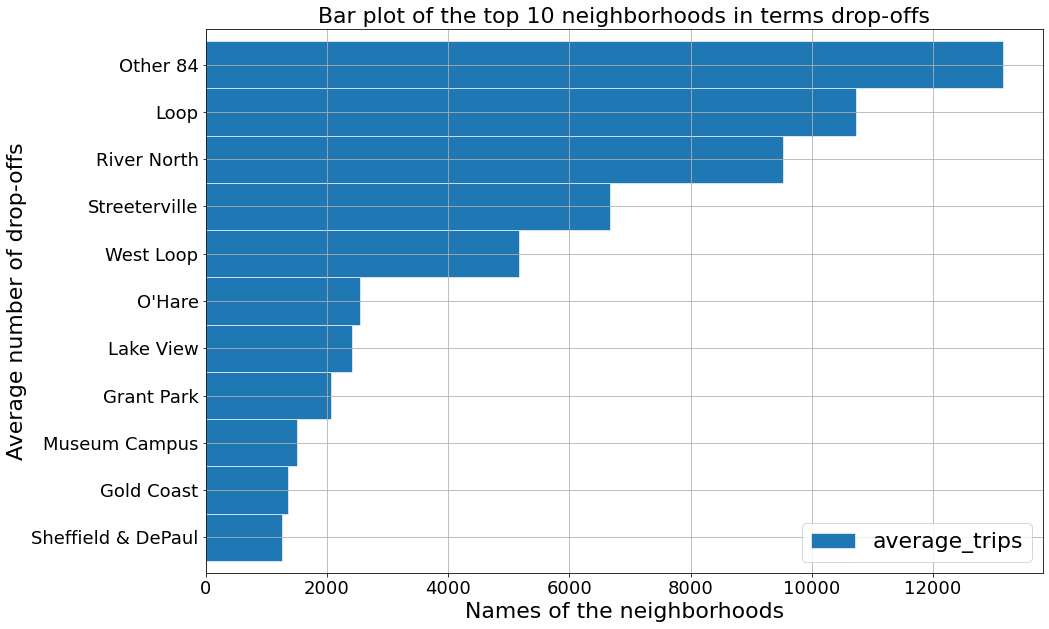

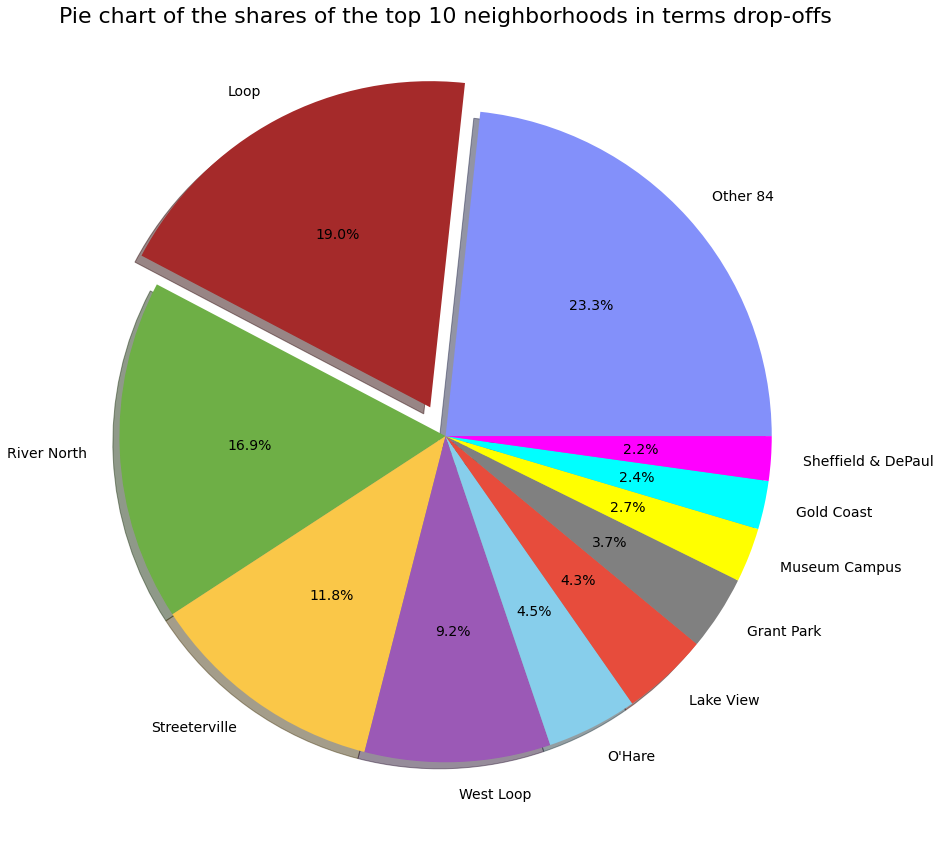

In [11]:
# Plot a bar graph
top_10_neigh = top_10_neigh.sort_values(by= 'average_trips') # Reverse the order for the graph.
ax = top_10_neigh.set_index('dropoff_location_name').plot.barh(grid=True, figsize=(15, 10), width=1,
                                                              edgecolor='white', linewidth=0.6)
ax.tick_params(axis='x', labelsize=18)
ax.tick_params(axis='y', labelsize=18)
ax.set_title('Bar plot of the top 10 neighborhoods in terms drop-offs', fontsize=22)
ax.set_xlabel('Names of the neighborhoods', fontsize=22)
ax.set_ylabel('Average number of drop-offs', fontsize=22)
ax.legend(fontsize=22)
plt.show()
print()
# Add the share of rides for each neighborhood in percentage.
top_10_neigh['trips_pct'] = (top_10_neigh['average_trips']/ sum(top_10_neigh['average_trips'])*100).round(1)

# Plot a pie chart
plt.figure(figsize=(15,15))
top_10_neigh = top_10_neigh.sort_values(by= 'average_trips', ascending=False) # Reverse the order for the graph.

top_10_neigh_list = ['Other 84', 'Loop',
 'River North',
 'Streeterville',
 'West Loop',
 "O'Hare",
 'Lake View',
 'Grant Park',
 'Museum Campus',
 'Gold Coast',
 'Sheffield & DePaul']

explode = (0, 0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0)

colors =  ['#8390FA', 'brown', '#6EAF46', '#FAC748', "#9b59b6", "skyblue",
           '#e74c3c', 'grey', 'yellow', 'cyan', 'magenta']
plt.pie(top_10_neigh['trips_pct'].head(11), explode=explode, colors = colors,
              labels=top_10_neigh_list, autopct='%1.1f%%', textprops={'fontsize': 14},
        shadow=True, startangle=0)
plt.title('Pie chart of the shares of the top 10 neighborhoods in terms drop-offs', fontsize=22)

plt.show()


From the pie chart, we see that slightly more than one-third of the market share goes to the two most popular neighborhoods. The top 4 got half of the market share, while the `'Other 84'` got slightly less than one quarter.

Next, we plot the taxi companies by their number of rides.

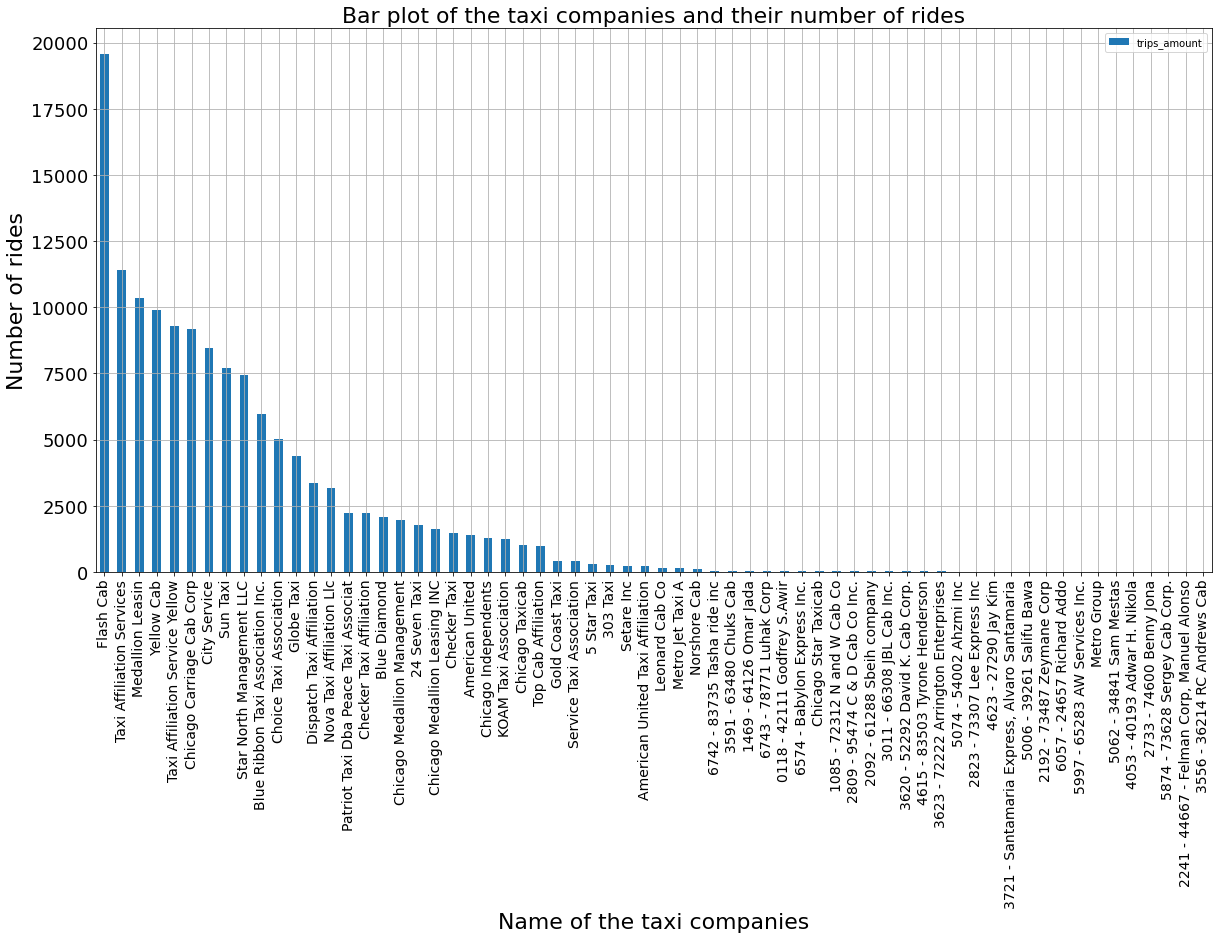

In [12]:
# Plot a bar graph

ax = result_01.set_index('company_name').plot.bar(grid=True, figsize=(20, 10))
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=18)
ax.set_title('Bar plot of the taxi companies and their number of rides', fontsize=22)
ax.set_xlabel('Name of the taxi companies', fontsize=22)
ax.set_ylabel('Number of rides', fontsize=22)

plt.show()


We can see that the number of recorded rides for about half of the taxi companies are not significant. So, let us replot the graph for the 35 busiest taxi companies.

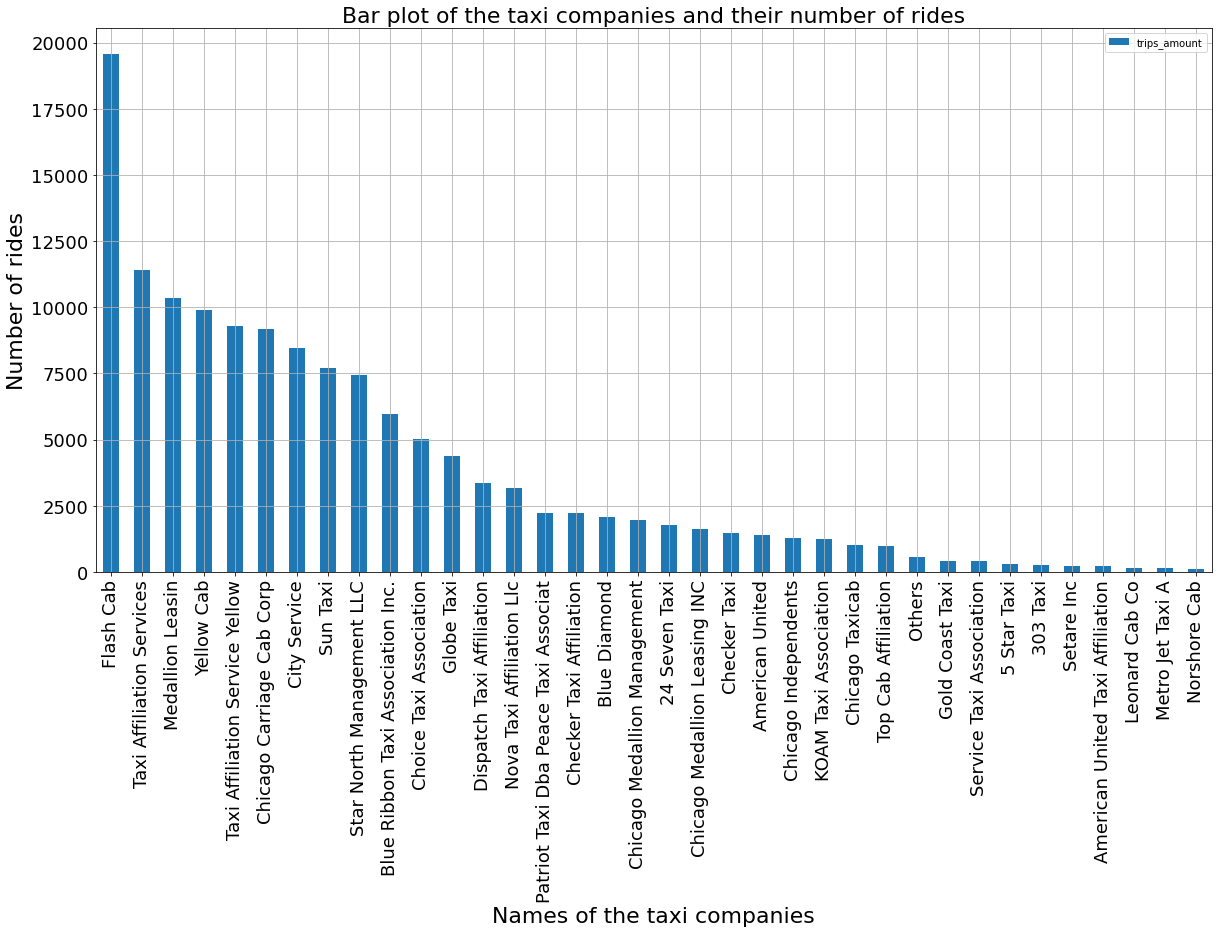

In [13]:
busiest_35 = result_01.sort_values(by='trips_amount', ascending=False).head(35)

sum_others = result_01.loc[~result_01['company_name'].isin(busiest_35['company_name']), 
                           'trips_amount'].sum()


# Aggregate data for the remaining neighborhods under 'Others' as dropoff_location_name
busiest_35 = busiest_35.append({'company_name': 'Others', 'trips_amount':sum_others}, 
                               ignore_index=True).sort_values(by='trips_amount', ascending=False)

ax = busiest_35.set_index('company_name').plot.bar(grid=True, figsize=(20, 10))
ax.tick_params(axis='x', labelsize=18)
ax.tick_params(axis='y', labelsize=18)
ax.set_title('Bar plot of the taxi companies and their number of rides', fontsize=22)
ax.set_xlabel('Names of the taxi companies', fontsize=22)
ax.set_ylabel('Number of rides', fontsize=22)
plt.show()


Let us also list the companies which made it above the 5000 rides threshold.

In [14]:
# Display head rows from the dataframe
display(busiest_35.head(11))


,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


Flash Cab is found to be the most active partner for almost 20,000 trips. Next comes taxi affiliation services, which get slightly more than half the rides of flash cabs. The name "affiliate service" or "taxi association" indicates that some business partners are actually affiliate networks. A Google search found http://www.hypewriter.com.au/affiliate-marketing/what-is-an-affiliate-network/ with the following description:

<i><u>"An Affiliate Network, is a company who is dedicated to connecting merchants with affiliates and tracking all of the sales, leads, commissions etc as well as managing the branding links, banners, videos etc. for the merchants."</u></i>

Ideally, we should communicate with our business peers to learn more about how these networks work. However, it is now clearer why some companies dominate the market. It's a network of small taxi companies. A quote from the Flash Cab development history at https://flashcab.com/about-us/:

<i><u>"FLASH expanded the fleet by both attracting drivers and acquiring smaller cab companies, such as PUBLIC TAXI SERVICE. The name was modified as time went on, first as VETERANS FLASH CAB, then RADIO FLASH CORP., and finally to today’s moniker, FLASH CAB CO. FLASH, as it continues today, was always eager to integrate new, top of the line technology, consistently offering Chicago a better taxi dispatch service.

Cab drivers wanted to be affiliated with a taxi service owned and led by one of their own. The respectable ‘old cab driver’, as Mr. Dickholtz was fondly referred to, knew how the cab business operated and how to serve both the passenger and the driver. As the old saying goes, know thy business and you will succeed.

Arthur Dickholtz passed away in May of 1988, but his dreams for FLASH and its affiliates have lived on. As the FLASH torch was passed on to its current owners, FLASH CAB CO. continued to incorporate cutting edge technology, maintain driver support systems, and add management services for today’s business world. The old cab driver would have been proud to see that the company he started has matured to what it is today, dispatching taxis to thousands of people all over Chicago, (in a flash!)."</u></i>

Concluding Remarks: In this step, we brought Zuber ride-sharing data for November 2017 to our workspace and analyzed the content of the datasets. We found that the date column should be converted to a datetime object. We also identified some statistical outliers, except for those related to travel duration, which will be addressed in the next step. After evaluating the data, we discovered the most popular taxi companies and drop-off neighborhoods. A visualization revealed a significant difference in the shares of taxi companies and drop-off districts, with companies like Flash Cab and neighborhoods like Loop and River North outperforming others significantly.

<a class="anchor" id="step5"></a> 
### Step 5. Hypothesis testing

In this step, we are going to test the following hypothesis:
- Hypothesis: The average duration of rides from Loop neighborhood to O'Hare International Airport changes on rainy Sundays.

The hypothesis statement is not clear on how to group the data. There are two options for grouping the data, one based on overall weather conditions, and one based on whether it rained for at least an hour on a particular Sunday. Without clarification from a colleague, we will explore both options and discuss the limitations of each approach when conducting tests.

To test both hypotheses, we will use a t-test which is commonly used when comparing the means of two populations from a dataset. However, it's important to keep in mind that the t-test is sensitive to outliers, as it is based on the sample mean and variance. Therefore, it's crucial to check for statistical outliers before running the test.

<a class="anchor" id="step5-1"></a> 
#### Step 5.1 First test

We formulate the null and alternative hypotheses as follows:
- **Null Hypothesis:** The average duration of rides from Loop neighborhood to O'Hare International Airport on Sunday hours are equal regardless the weather condition is 'Good' or 'Bad'.
- **Alternative Hypothesis:** The average duration of rides from Loop neighborhood to O'Hare International Airport differs on Sunday hours depending on 'Good' or 'Bad' weather conditions.

Let us analyze the statistical outliers via a scatter plot.

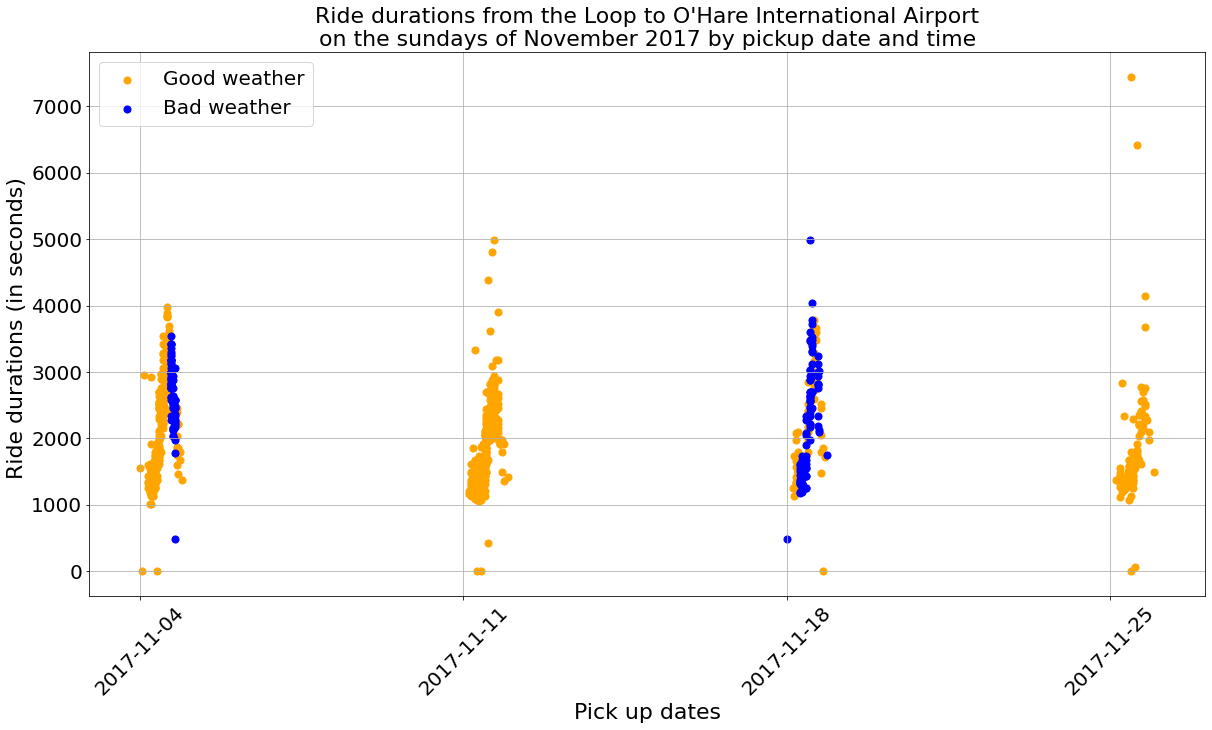

In [15]:
# Generate a scatter plot
plt.figure(figsize=(20,10))
plt.scatter(result_07.loc[result_07['weather_conditions'] == 'Good','start_ts'], 
            result_07.loc[result_07['weather_conditions'] == 'Good', 'duration_seconds'], 
            s=50, c='Orange', label='Good weather')
plt.scatter(result_07.loc[result_07['weather_conditions'] == 'Bad','start_ts'], 
            result_07.loc[result_07['weather_conditions'] == 'Bad', 'duration_seconds'], 
            s=50, c='Blue', label='Bad weather')
plt.title("Ride durations from the Loop to O'Hare International Airport\n"
          "on the sundays of November 2017 by pickup date and time",
          fontsize=22)
plt.legend(fontsize=20)
plt.ylabel("Ride durations (in seconds) ", fontsize=22)
plt.xlabel('Pick up dates', fontsize=22)
plt.xticks(result_07['start_ts'].dt.date.unique(), fontsize=20, rotation=45)
plt.yticks(fontsize=20)
plt.grid()
plt.show()


In the graph above, isolated points away from clusters can be clearly observed. Let us summarize our observations on these isolated points:
- Not too many isolated points;
- Some rides lasted about 0 seconds. We know this is not possible. It is possible that the ride was canceled before the driver picked you up and such a ride will be recorded as his 0 second ride. These trips should be removed from the data sample. 
- Few rides took around 500 seconds, which can be (based on the observed durations) at most halfway in a very optimistic scenario. Is it possible the ride was completed without any traffic obstacle (maybe night time) and riding faster, perhaps faster than speed limits? This is highly unlikely, but in any case such behavior should still be considered as an anomaly. Whatever the reason may be, these rides should be considered as errors and thus discarded from our data.
- There were few rides taking up to 1000 seconds (17 minutes) more than the maximum ride durations observed within the clusters. There were also few rides on the last Sunday that took about an hour or more than the maximum ride duration observed within the cluster. In theory, the much longer than usual rides could have been caused by extreme conditions (like an accident blocking the road). However, in that case we would have expected the rides that started within a certain time frame, say from the accident, to form a cluster as well. So, we don't think weather conditions or traffic conditions explain these much longer than usual rides. One possible explanation could be that these rides were much longer because they were shared by mutliple customers. Some taxi app offers ride-sharing among clients at a cheaper rate, so perhaps the first customer was picked up at Loop, but next another was picked up at a different neighborhood before heading to the Airport. It is also possible that the client forgot something important in the Loop neighborhood, like passport at home, and the driver had to go back to the pick up location before riding back to the airport. Since such rides would be atypical, we also need to remove them from our hypothesis test samples.

Now let's take a look at the unreasonably short and much longer rides we just discussed.

In [16]:
# Filter outliers, store them separetely, and display them
outliers_short = result_07.loc[result_07['duration_seconds'] < 1000]
display(outliers_short)

outliers_long = result_07.loc[result_07['duration_seconds'] > 4000]
display(outliers_long)


,start_ts,weather_conditions,duration_seconds,start_date,start_time
15,2017-11-25 13:00:00,Good,60.0,25,13
163,2017-11-11 09:00:00,Good,0.0,11,9
168,2017-11-11 07:00:00,Good,0.0,11,7
203,2017-11-18 00:00:00,Bad,480.0,18,0
204,2017-11-18 19:00:00,Good,0.0,18,19
424,2017-11-11 13:00:00,Good,420.0,11,13
552,2017-11-04 01:00:00,Good,0.0,4,1
801,2017-11-04 09:00:00,Good,0.0,4,9
860,2017-11-04 18:00:00,Bad,480.0,4,18
1063,2017-11-25 11:00:00,Good,0.0,25,11


,start_ts,weather_conditions,duration_seconds,start_date,start_time
79,2017-11-11 15:00:00,Good,4800.0,11,15
110,2017-11-18 13:00:00,Bad,4044.0,18,13
276,2017-11-18 12:00:00,Bad,4980.0,18,12
353,2017-11-25 18:00:00,Good,4140.0,25,18
354,2017-11-25 11:00:00,Good,7440.0,25,11
583,2017-11-11 16:00:00,Good,4980.0,11,16
619,2017-11-25 14:00:00,Good,6420.0,25,14
646,2017-11-11 13:00:00,Good,4380.0,11,13


Then, we drop these outliers from our test data.

In [17]:
# Drop outliers from samples
outlier_list = list(outliers_short.index) + list(outliers_long.index)
print(outlier_list)

result_07_typ = result_07.drop(outlier_list)
result_07_typ.info()


[15, 163, 168, 203, 204, 424, 552, 801, 860, 1063, 79, 110, 276, 353, 354, 583, 619, 646]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1050 entries, 0 to 1067
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1050 non-null   datetime64[ns]
 1   weather_conditions  1050 non-null   object        
 2   duration_seconds    1050 non-null   float64       
 3   start_date          1050 non-null   int64         
 4   start_time          1050 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 49.2+ KB


It's time to run the test. The scipy library has implemented the test algorithms, so you don't have to worry about coding. However, we need to decide on the values for two variables. The first is the critical value alpha, which sets the significance level for hypothesis testing. It should be set to 5%. The second is the "equal_var" argument for the test algorithm. This argument should be set to true if the samples are expected to come from populations with similar parameters, and false if they are expected to come from populations with different parameters. To determine the value of this argument, we should calculate the empirical variances for each sample group and set it to true if the variances do not differ by more than 5%. If the difference is large, set it to false.

In [18]:
# Testing the Hypothesis

# Get results
results_bad = result_07_typ.loc[result_07_typ['weather_conditions']=='Bad']
results_good = result_07_typ.loc[(result_07_typ['weather_conditions']=='Good')]

# Get sample 1
sample_1 = results_bad['duration_seconds'].to_numpy() 
                            
# Get sample 2
sample_2 = results_good['duration_seconds'].to_numpy()


# Check if sample variances differ more than 5%
eq_var = False
pct_c1 = np.abs(np.var(sample_1)-np.var(sample_2)) / np.var(sample_1)
pct_c2 = np.abs(np.var(sample_1)-np.var(sample_2)) / np.var(sample_2)

if pct_c1 <= 0.05 or pct_c2 <= 0.05:
    eq_var = True

alpha = .05 # critical statistical significance level
                        # if the p-value is less than alpha, we reject the hypothesis

# Perform the test
results = st.ttest_ind(sample_1, sample_2, equal_var=eq_var)
# results = st.ttest_rel(sample_1, sample_2)



print('Sample mean of ride durations in "Bad" weather:', 
      '{} seconds'.format(np.mean(sample_1).round(0).astype('int')))
print('Sample mean of ride durations in "Good" weather:', 
      '{} seconds'.format(np.mean(sample_2).round(0).astype('int')))
print()
print('eq_var argument of t-test set to:', eq_var)
print()
print('p-value: ', results.pvalue)

if (results.pvalue < alpha):
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis") 
    

Sample mean of ride durations in "Bad" weather: 2426 seconds
Sample mean of ride durations in "Good" weather: 1994 seconds

eq_var argument of t-test set to: False

p-value:  1.083629710157954e-13
We reject the null hypothesis


You can see that the sample means of ride durations in 'Bad' and 'Good' weather times are different. Test results show that the probability of randomly getting a difference of this size or more is close to zero (1.08e^{-13}%). Therefore, we can reject the null hypothesis and conclude that there is a significant difference in average travel times for trips made in "Good" and "Bad" weather.

We performed a first hypothesis test by grouping the data into 'Good' and 'Bad' weather samples. However, as we will show later, this approach can be misleading because it does not take into account other potential external factors that may play a role. Rush hour (if the weather happens to be bad) may have caused it, rather than bad weather (alone or not). Let's draw the scatterplot again (without the deleted points) and make additional observations from there.

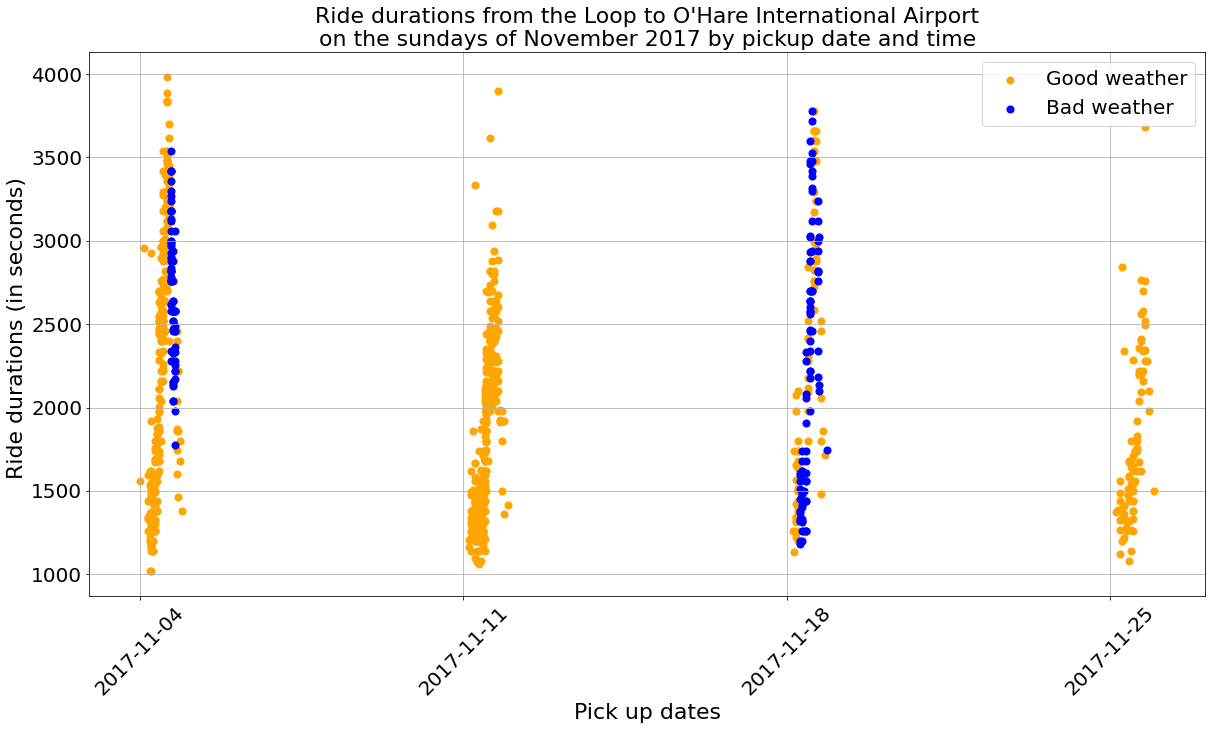

In [19]:
# Generate scatter plot
plt.figure(figsize=(20,10))
plt.scatter(result_07_typ.loc[result_07['weather_conditions'] == 'Good','start_ts'], 
            result_07_typ.loc[result_07['weather_conditions'] == 'Good', 'duration_seconds'], 
            s=50, c='Orange', label='Good weather')
plt.scatter(result_07_typ.loc[result_07['weather_conditions'] == 'Bad','start_ts'], 
            result_07_typ.loc[result_07['weather_conditions'] == 'Bad', 'duration_seconds'], 
            s=50, c='Blue', label='Bad weather')
plt.title("Ride durations from the Loop to O'Hare International Airport\n"
          "on the sundays of November 2017 by pickup date and time",
          fontsize=22)
plt.legend(fontsize=20)
plt.ylabel("Ride durations (in seconds) ", fontsize=22)
plt.xlabel('Pick up dates', fontsize=22)
plt.xticks(result_07['start_ts'].dt.date.unique(), fontsize=20, rotation=45)
plt.yticks(fontsize=20)
plt.grid()
plt.show()


For each Sunday in November 2017, there is an elongated cluster of points in the data. From these clusters, we can observe the following:

- The lower limit of the clusters is around 1000 seconds, or 17 minutes.
- Ride durations within the clusters can be up to three times longer than the lower limit.
- The first and third Sundays have more rides that last between 3000 to 4000 seconds, or 67 minutes, compared to the second and fourth Sundays, where the upper limit is around 50 minutes.
- Interestingly, the first and third clusters correspond to rainy Sundays, even though the weather is not necessarily tagged as 'Bad' for all of the rides. Both the orange and blue clusters, corresponding to 'Good' and 'Bad' weather conditions, respectively, are elongated in shape.

In summary, we have reached two conclusions. Firstly, there are variations in ride durations within each cluster, but weather conditions do not appear to be the main cause. This suggests that there may be other external factors affecting ride durations, such as peak hour traffic. This is not surprising as we all know that ride durations can vary depending on traffic. The clusters of points seem to fall within a reasonable range, and variations in ride durations could also depend on the exact pick-up location in the Loop neighborhood and the route taken by the taxi driver. However, we expect these secondary factors to have less significant impact. Based on this conclusion, we can hypothesize that average ride durations change according to the time of day (peak versus non-peak hours). We will not perform a formal hypothesis test, but we will analyze outliers through visualizations in the next subsection to provide some insight on this hypothesis.

Secondly, there are variations in the upper limits of ride durations among clusters. These variations seem to occur in parallel with the overall weather situation of the Sunday. Therefore, we hypothesize that the average ride duration is longer on rainy Sundays, which we will formally test in the next subsection.

<a class="anchor" id="step5-2"></a> 
#### Step 5.2 Second test:

We formulate the null and alternative hypotheses as follows:
- **Null Hypothesis:** The hourly average durations of rides from Loop neighborhood to O'Hare International Airport on Sundays with bad and good weathers are equal. 
- **Alternative Hypothesis:** The hourly average duration of rides from Loop neighborhood to O'Hare International Airport on bad weather Sundays differs from good ones.

Let us now plot the data for each sunday of the month separately. We will also mark the weather condition on these plots.

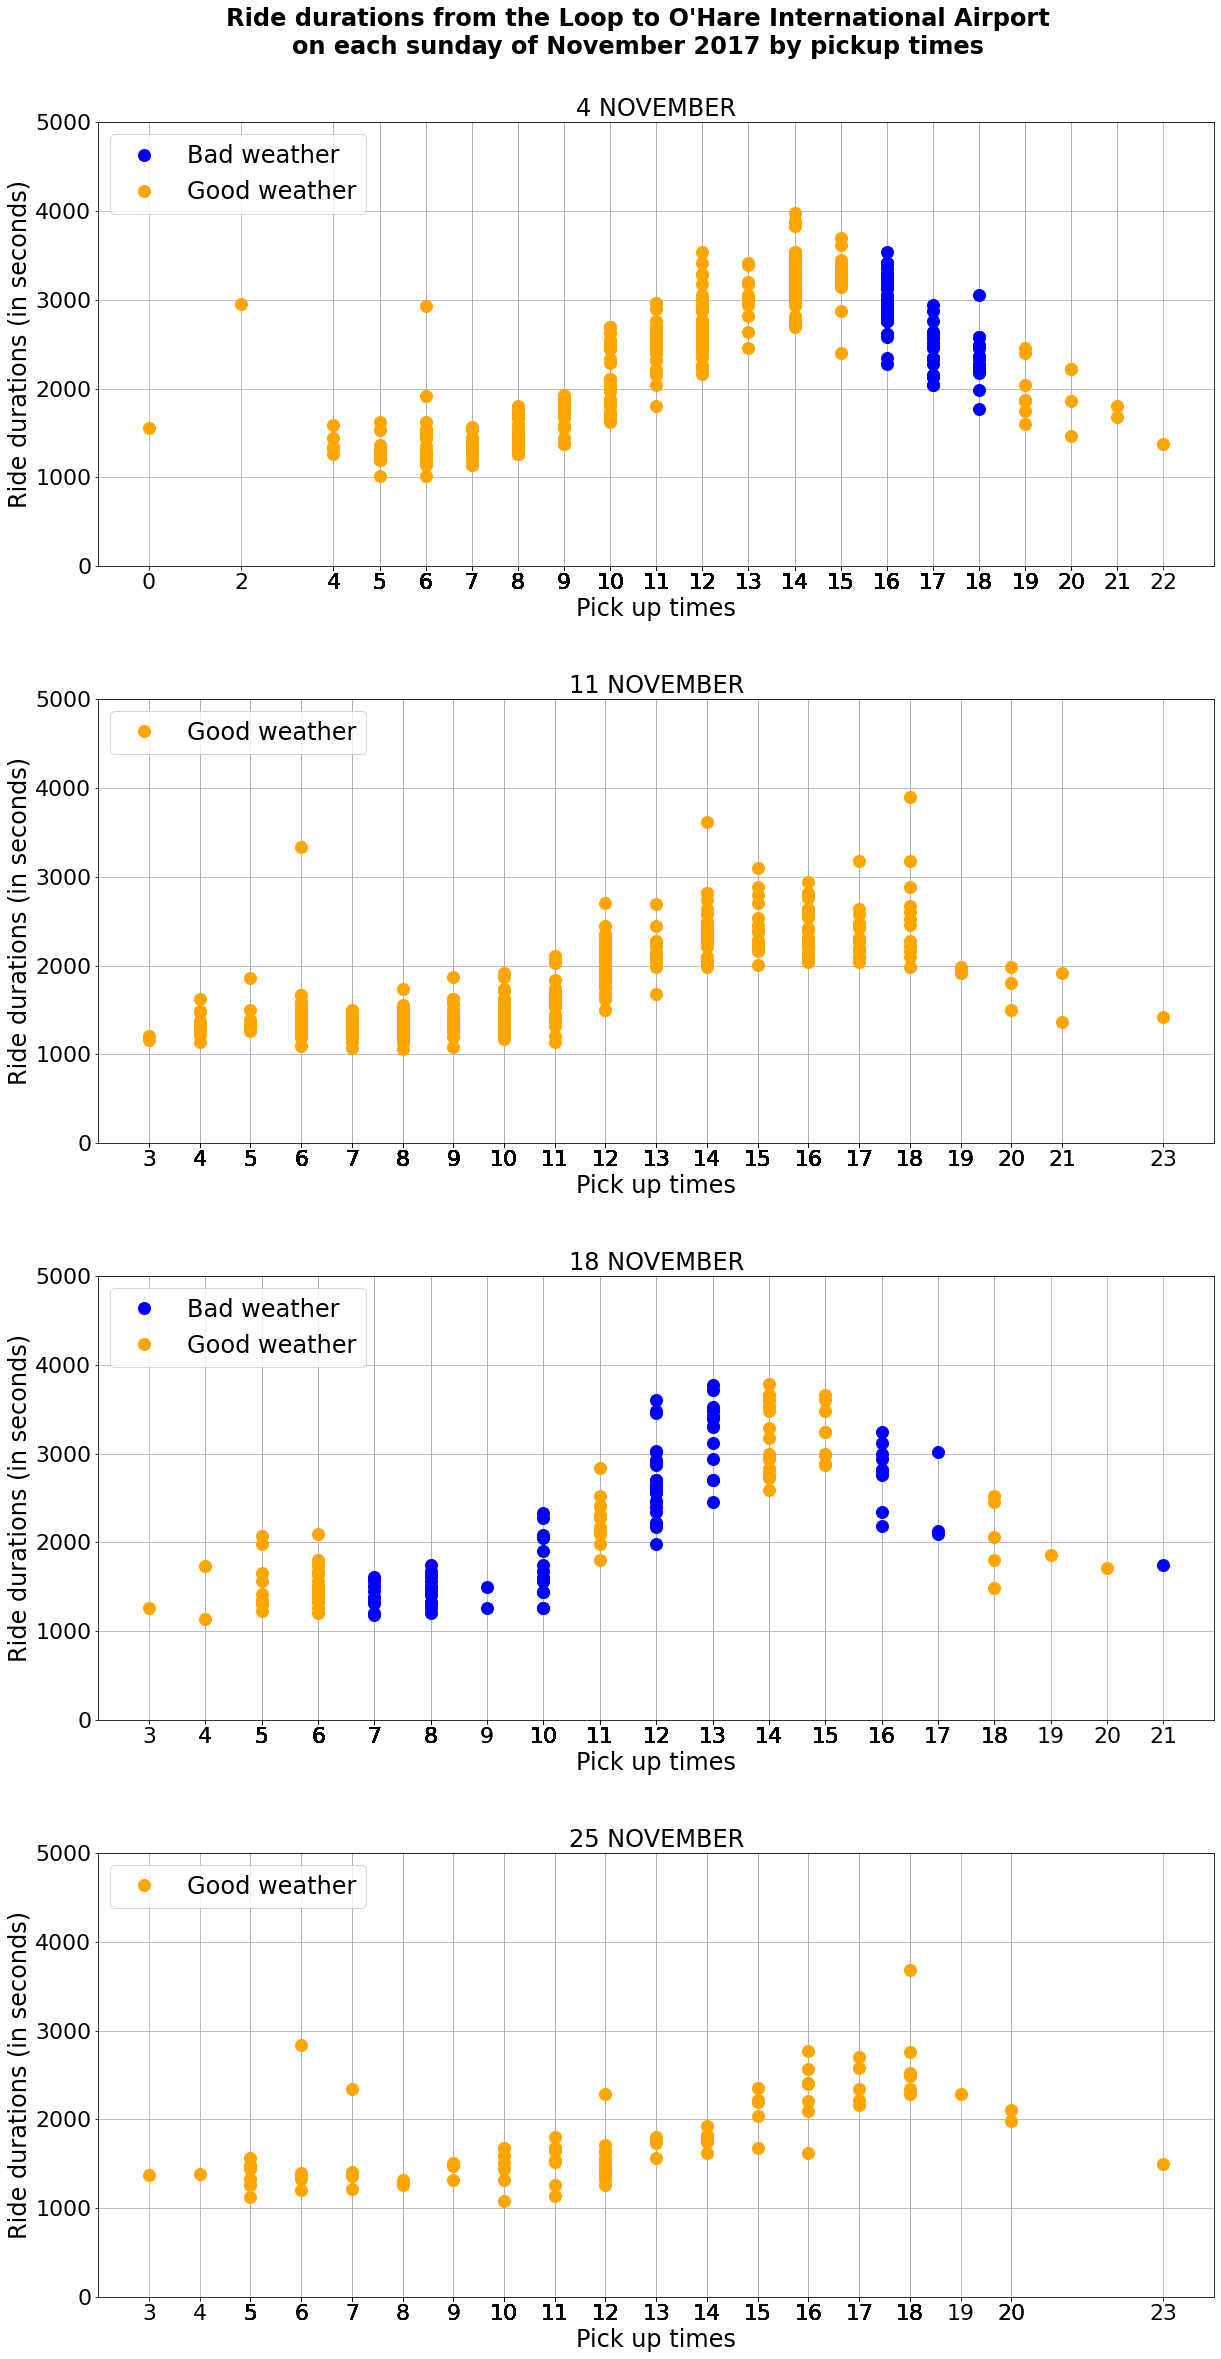

In [20]:
# Generate plot of hourly ride durations for each Sunday
fig, ax = plt.subplots(4, 1, figsize=(20, 40))

groups_1 = result_07_typ.groupby(by='start_date')

colors = {'Good':'orange', 'Bad':'blue'}

i = 0
for name, group in groups_1:
    groups_2 = group.groupby(by='weather_conditions')
    for name_2, group_2 in groups_2:

        ax[i].plot(group_2['start_time'], group_2['duration_seconds'],
               marker='o', linestyle='', ms=12, 
                label='{} weather'.format(name_2), c = colors[group_2['weather_conditions'].max()]
               )
        ax[i].legend(fontsize=24, loc= 'upper left')
    ax[i].set_title('{} NOVEMBER'.format(str.upper(str(name))), fontsize=24, fontweight='light')
    ax[i].grid()
    ax[i].set_xlabel('Pick up times', fontsize=24)
    ax[i].set_ylabel('Ride durations (in seconds)', fontsize=24)
#    ax[i].set_yticks(fontsize=20, rotation=45)
    ax[i].set_ylim(0, 5000)
    ax[i].tick_params(axis='x', labelsize=22)
    ax[i].tick_params(axis='y', labelsize=22)
    ax[i].set_xticks(group['start_time'])
    i += 1

plt.suptitle("Ride durations from the Loop to O'Hare International Airport\n"
          "on each sunday of November 2017 by pickup times\n\n",
          fontsize=24, fontweight='bold', y=.92)


# Adjust spacing between the subplots
plt.subplots_adjust(hspace = 0.3)
plt.show()



From the plot, we can see that afternoon rides tend to be longer in duration, which supports our previous suspicion that in-cluster variations may be caused by peak hours. We also observe that the last Sunday of the month has more uniform ride durations except for a few cases, which could be due to less data for the last Sunday or it could be real. Additionally, we can see that not all statistical outliers have been removed, such as the ride that took more than 1000 seconds (17 minutes more) than all the other rides on the last Sunday at 6:00 am, which could be due to the ride being shared by multiple clients. To ensure that we include only typical rides, we should remove these points manually before computing the average ride durations for each hour. An outlier detection algorithm could have been useful, but since we have only a few points to remove and they can be visually identified, we will remove them manually.

In [21]:
# Drop outliers from 4 November
# Rides taking more than 2500 seconds at 02:00 and 06:00
result_07_typ = result_07_typ.drop(list(result_07_typ.loc[(result_07['start_date'] == 4) 
                                                      & (result_07_typ['start_time'].isin([2, 6])) &
                                                      (result_07['duration_seconds'] > 2500)].index))


    

# Drop outliers from 11 November
# rides taking more than 3000 seconds at 06:00, 14:00, 17:00, and 18:00 
result_07_typ = result_07_typ.drop(list(result_07_typ.loc[(result_07_typ['start_date'] == 11) 
                                                      & (result_07_typ['start_time'].isin([6, 14, 17, 18])) &
                                                      (result_07_typ['duration_seconds'] > 3000)].index))

# Drop outliers from 25 November
# rides taking more than 2000 seconds at 06:00, 07:00, and 12:00 
result_07_typ = result_07_typ.drop(list(result_07_typ.loc[(result_07_typ['start_date'] == 25) 
                                                      & (result_07_typ['start_time'].isin([6, 7, 12])) &
                                                      (result_07_typ['duration_seconds'] > 2000)].index))
# Rides taking more than 3000 seconds at 18:00
result_07_typ = result_07_typ.drop(list(result_07_typ.loc[(result_07_typ['start_date'] == 25) 
                                                      & (result_07_typ['start_time'] == 18) &
                                                      (result_07_typ['duration_seconds'] > 3000)].index))

result_07_typ.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1039 entries, 0 to 1067
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1039 non-null   datetime64[ns]
 1   weather_conditions  1039 non-null   object        
 2   duration_seconds    1039 non-null   float64       
 3   start_date          1039 non-null   int64         
 4   start_time          1039 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 48.7+ KB


Next, we compute the hourly average ride durations for each Sundays separetely. Note that by taking separate averages for each Sunday, we compute an estimate of the hourly average ride durations with all external conditions being (almost) identical.

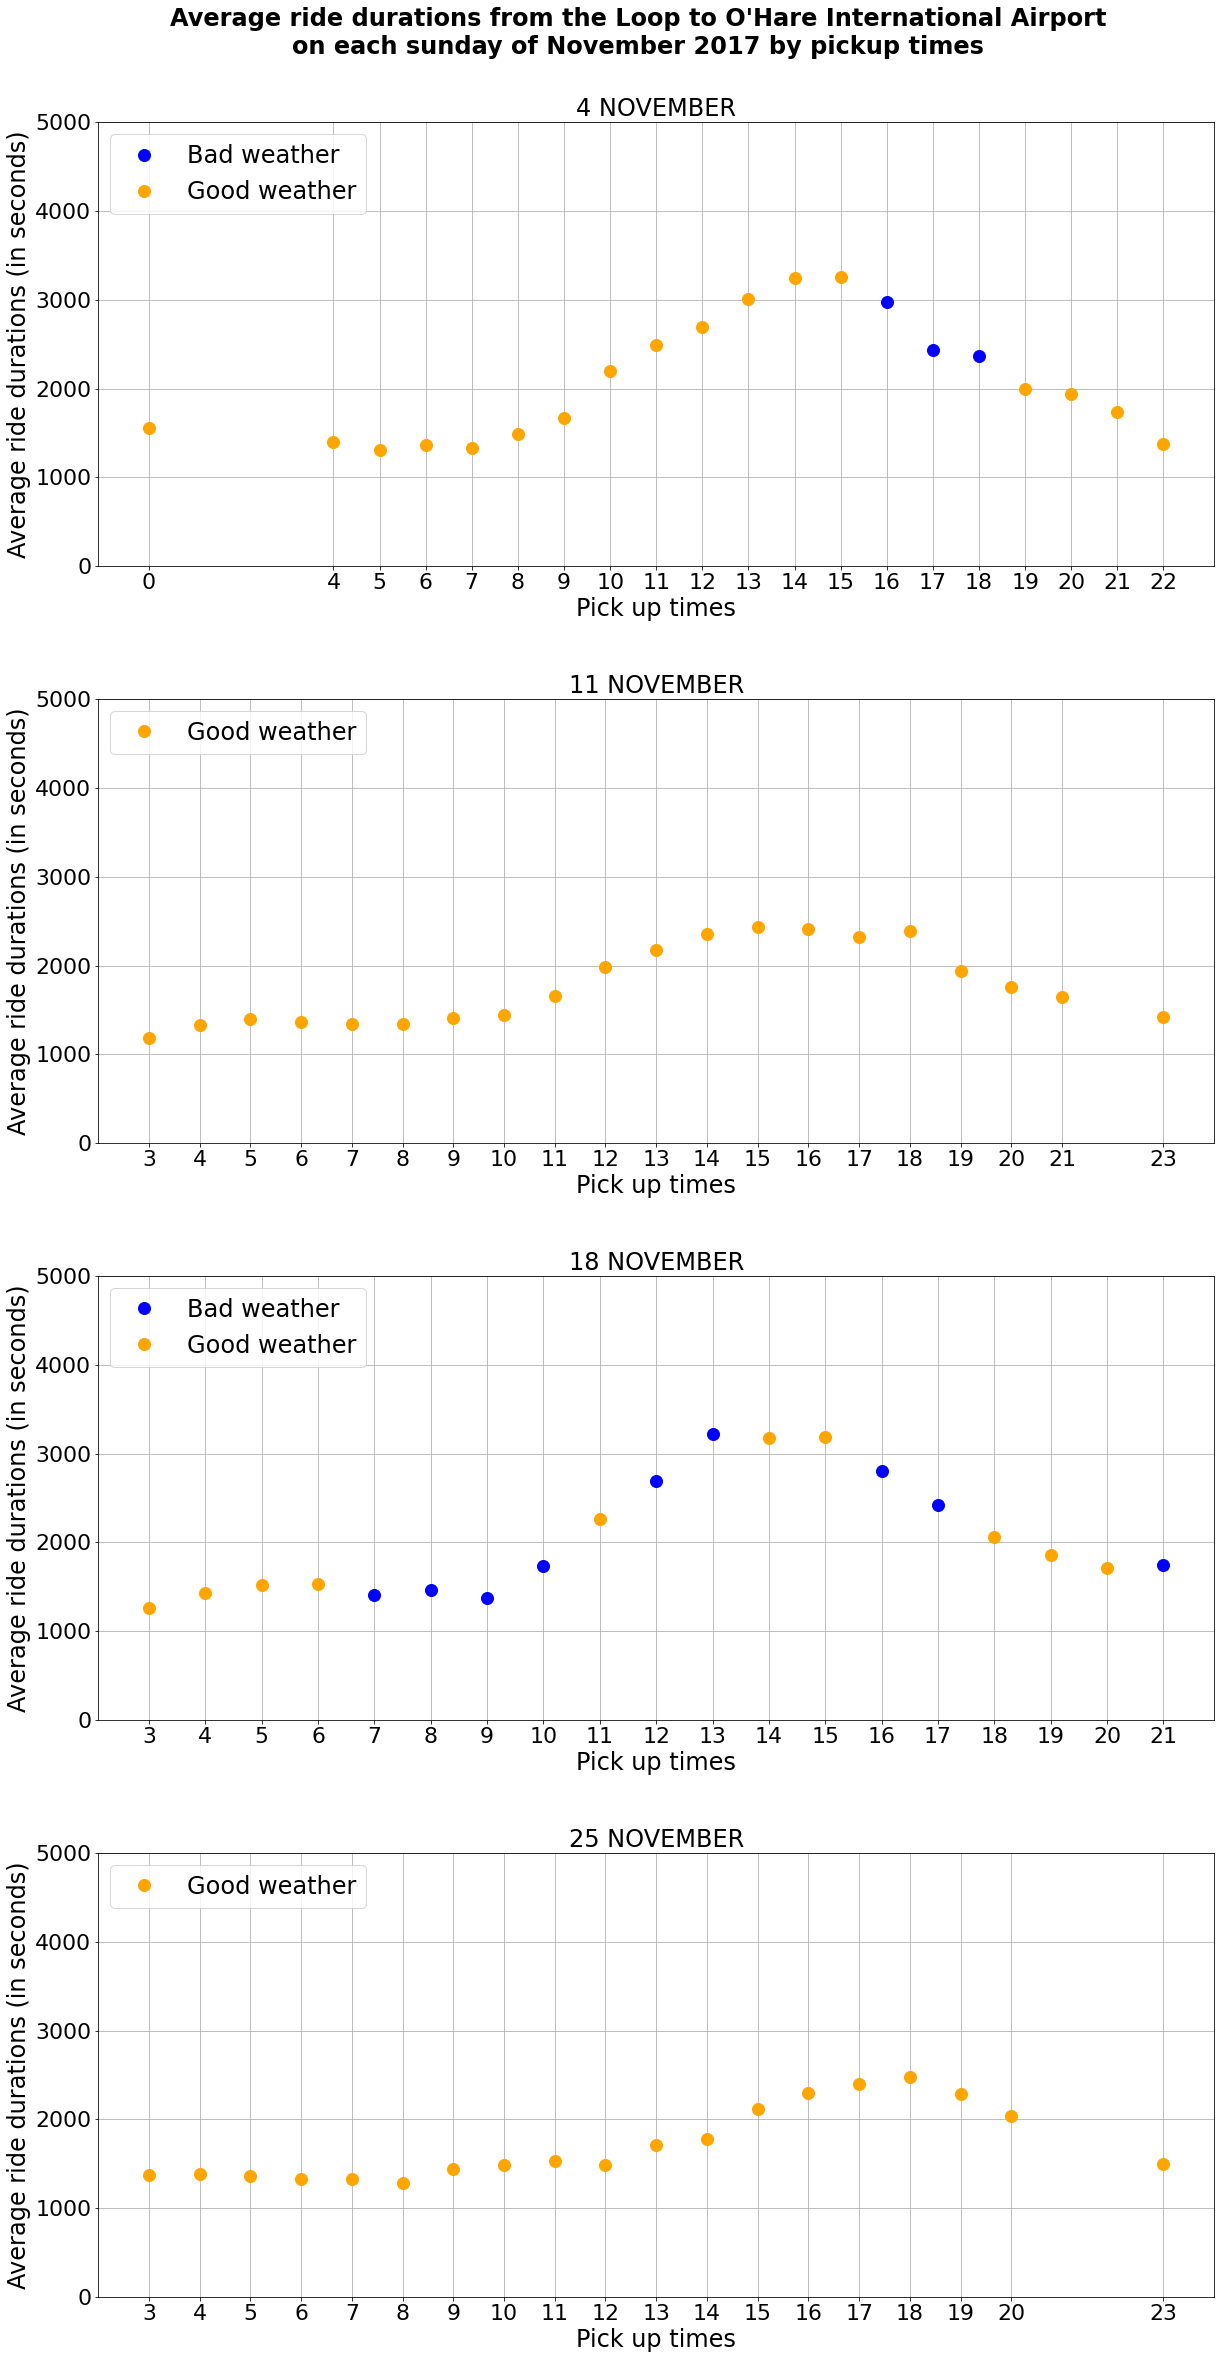

In [22]:
# Generate plot of hourly average ride durations for each Sunday
fig, ax = plt.subplots(4, 1, figsize=(20, 40))

result_07_typ_averaged = result_07_typ.groupby(by=['start_date', 'start_time']).agg(
    {'duration_seconds':'mean', 'weather_conditions':'max'}).reset_index()

colors = {'Good':'orange', 'Bad':'blue'}


# Set the value of the maximum number of rows that can be displayed to 100.
pd.set_option('display.max_rows', 100)

groups_1 = result_07_typ_averaged.groupby(by='start_date')

i = 0
for name, group in groups_1:
    groups_2 = group.groupby(by='weather_conditions')
    for name_2, group_2 in groups_2:

        ax[i].plot(group_2['start_time'], group_2['duration_seconds'],
               marker='o', linestyle='', ms=12, 
               label='{} weather'.format(name_2), c = colors[group_2['weather_conditions'].max()]
               )
        ax[i].legend(fontsize=24,  loc= 'upper left')
    ax[i].set_title('{} NOVEMBER'.format(str.upper(str(name))), fontsize=24, fontweight='light')
    ax[i].grid()
    ax[i].set_xlabel('Pick up times', fontsize=24)
    ax[i].set_ylabel('Average ride durations (in seconds)', fontsize=24)
#    ax[i].set_yticks(fontsize=20, rotation=45)
    ax[i].set_ylim(0, 5000)

    ax[i].tick_params(axis='x', labelsize=22)
    ax[i].tick_params(axis='y', labelsize=22)
    ax[i].set_xticks(group['start_time'])
    i += 1

plt.suptitle("Average ride durations from the Loop to O'Hare International Airport\n"
          "on each sunday of November 2017 by pickup times\n\n",
          fontsize=24, fontweight='bold', y=.92)


# Adjust spacing between the subplots
plt.subplots_adjust(hspace = 0.3)
plt.show()


We will now formally test our hypothesis. One option would be to perform multiple independent tests, one for each hour where we have both good and bad weather samples. However, we only have a limited number of samples for each hour. Instead, we suggest using a paired sample t-test. This test is used to determine whether the mean difference between two sets of observations is zero. It is commonly used in clinical studies, but we find it appropriate for our case as well. We will take the mean of the hourly average ride durations for Sundays 4 and 18 November, as the weather was bad at some times on these Sundays. These mean values will be our first set of bad weather Sunday samples. We will repeat the same process for Sundays 11 and 25 November to get our good weather Sunday samples. The bad and good weather Sunday mean of hourly average ride duration samples will be considered as two hourly paired measurements taken at different weather conditions. The null hypothesis predicts that the true mean difference between the paired samples is zero, and any observable differences are explained by random variation. The alternative hypothesis assumes that the true mean difference between the paired samples is not equal to zero. For the paired sample t-test, we only need to set the alpha value, which we will set to 5%.

In [23]:
# Test hypothesis

# Filter data to get the bad weather samples
results_bad = result_07_typ_averaged.loc[result_07_typ_averaged['start_date'].isin([4, 18])].groupby(
    by=['start_time']).agg({'duration_seconds':'mean'}).reset_index().sort_values(by='start_time')
results_bad = results_bad.iloc[1:-1]

# Filter data to get the good weather samples
results_good = result_07_typ_averaged.loc[result_07_typ_averaged['start_date'].isin([11, 25])].groupby(
    by=['start_time']).agg({'duration_seconds':'mean'}).reset_index().sort_values(by='start_time')
results_good = results_good.iloc[:-1]

# Get sample 1
sample_1 = results_bad['duration_seconds'].to_numpy() 
                            
# Get sample 2
sample_2 = results_good['duration_seconds'].to_numpy()

alpha = .05 # critical statistical significance level
                        # if the p-value is less than alpha, we reject the hypothesis

# Perform the test
# results = st.ttest_ind(sample_1, sample_2, equal_var=eq_var)
results = st.ttest_rel(sample_1, sample_2)

print('p-value: ', results.pvalue)

if (results.pvalue < alpha):
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis") 
    

p-value:  0.006082828154971968
We reject the null hypothesis


Here the p-value tells us that there is 0.6% probability of obtaining a result like the one that was observed if the null hypothesis was true. Hence, we reject the null hypothesis and conclude that the mean of the hourly average ride durations for bad weather Sundays differ significantly from the ones for good weather Sundays. 

In this step, we conducted two hypothesis tests to formally examine the relationship between ride durations and weather conditions. Initially, we filtered the data based on Good and Bad weather conditions to generate our two sets of test samples. However, we acknowledged the potential limitation of this approach and found that variations in ride durations could also be caused by peak hours. Therefore, we performed a second test by pairing the hourly means of the hourly average ride durations for the first and third Sundays of the month with the hourly means of those for the second and fourth Sundays of the month. The results of the tests are summarized in Step 6.

<a class="anchor" id="step6"></a> 
### Step 6 General conclusion

In this project, we analyzed ride-sharing data from Sundays in November 2017. We began by preparing the data for analysis by doing necessary data pre-processing. Our first task was to identify our most successful business partners, specifically the top taxi companies, and our target clients' preferences. We discovered that taxi affiliate networks and associations were our top business partners, with the Flash Cab company being the most successful, having almost double the number of rides compared to its closest competitor. Our target clients were found to mostly take rides to the Loop neighborhood, which is described as a vibrant area featuring eclectic eateries, shops, theaters and parks, mostly comprising of high-rises.

As a second task, we studied the dependence of ride durations on weather conditions. Scatter plots of ride durations for each Sunday of November 2017 showed variations in ride durations within clusters and variations in upper limits of ride durations among clusters. To further investigate this, we generated various plots showing the hourly ride durations and their averages for each Sunday. This helped us to see that in-cluster ride durations varied according to peak hours, with afternoon rides tending to be longer. This pattern occurred in both good and bad weather conditions. However, we noticed that on Sundays with bad weather (rainy at some times of the day), ride durations tended to be longer during peak hours, but not necessarily outside of peak afternoon hours. This led to the observed variations in upper limits of ride durations among clusters. Our hypothesis test revealed that the hourly means of the hourly average ride durations for bad weather Sundays were different from those for good weather Sundays. Based on our observations, one possible explanation for this could be that when a day is forecasted to be bad, more people may prefer to use private transportation, such as their own cars or taxis. In these cases, non-peak hour ride durations may not be affected significantly even if it rains. However, during peak hours, even if it does not rain the whole day, the already longer ride durations will tend to last even longer. In other words, bad weather itself could certainly slow down rides, but its impact is felt most significantly